# Heart Disease Prediction using Logistic Regression

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, the model predicts that the instance belongs to class 1 (presence of heart disease); otherwise, it predicts class 0 (absence of heart disease). This makes it a binary classifier. In this analysis, we will explore the theory behind `Logistic Regression` and use it to predict the presence of heart disease based on clinical and demographic features.

This dataset contains the following features:

### Demographic Factors
* `Age`: Patient's age
* `Sex`: Patient's gender

### Clinical Measurements
* `RestingBP`: Resting blood pressure (mm Hg)
* `Cholesterol`: Cholesterol levels (mg/dL)
* `FastingBS`: Fasting blood sugar (1 = if fasting blood sugar > 120 mg/dL, 0 = otherwise)

### Cardiac Assessments
* `ChestPainType`: Type of chest pain experienced
* `RestingECG`: Results of resting electrocardiogram
* `MaxHR`: Maximum heart rate achieved

### Exercise-Related Indicators
* `ExerciseAngina`: Angina induced by exercise (1 = Yes, 0 = No)
* `Oldpeak`: ST depression induced by exercise relative to rest

### Additional Cardiac Parameters
* `ST_Slope`: Slope of the peak exercise ST segment

### Target Variable
* `HeartDisease`: 0 or 1 indicating absence or presence of heart disease

Through this logistic regression approach, we aim to identify significant predictors and develop a model that could assist medical professionals in early risk assessment of heart disease.

### Step - 01: Import all libraries and Setup

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Save model
from joblib import dump

# Set visualization style
plt.style.use('fivethirtyeight')
sns.set_palette("husl")

### Step - 02: Load Dataset and Initial Data Check

In [ ]:
# Load data
df = pd.read_csv('../dataset/heart.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSample Data:")
print(df.head())

Dataset Shape: (918, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0


### Step - 03: Data Cleaning and Pre-processing

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
        print(f"Outliers in {col}: {len(df[df[col] < lower_bound])}")
    return df

# Check for outliers in numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# for col in numerical_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
#     print(f"\nOutliers in {col}: {len(outliers)}")

# One-hot encoding for categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.head(10))

Number of duplicates: 0
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   
5   39        120          339          0    170      0.0             0   
6   45        130          237          0    170      0.0             0   
7   54        110          208          0    142      0.0             0   
8   37        140          207          0    130      1.5             1   
9   48        120          284          0    120      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False      

### Step - 04: Data Visualization for insights

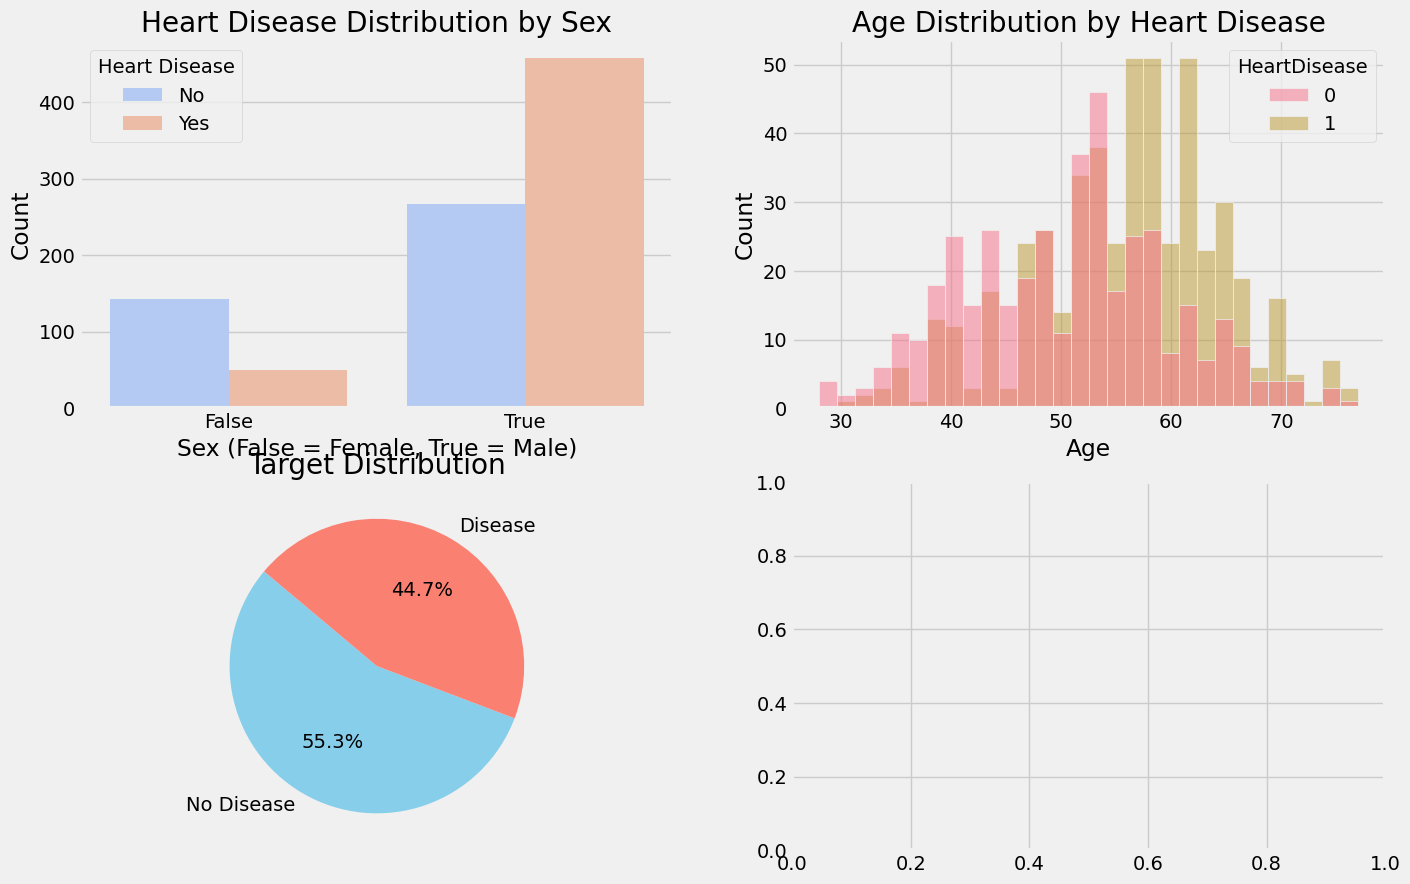

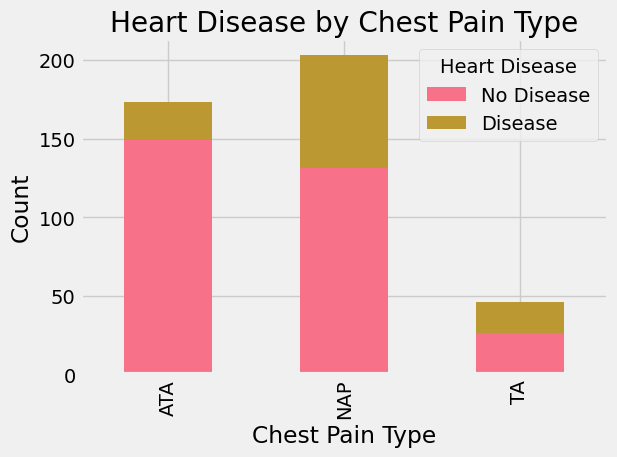

In [6]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Heart Disease Distribution by Sex
plt.subplot(2, 2, 1)
sns.countplot(x="Sex_M", hue="HeartDisease", data=df, palette="coolwarm")
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex (False = Female, True = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])

# 2. Age Distribution by Heart Disease
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Age', hue='HeartDisease', bins=30)
plt.title('Age Distribution by Heart Disease')

# 3. Target Distribution (Pie Chart)
plt.subplot(2, 2, 3)
target_counts = df["HeartDisease"].value_counts()
plt.pie(target_counts, labels=["No Disease", "Disease"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Target Distribution")

# 4. Chest Pain Type Distribution
plt.subplot(2, 2, 4)
# Create a new dataframe for chest pain types
chest_pain_data = pd.DataFrame({
    'Type': ['ATA', 'NAP', 'TA'],
    'No Disease': [
        df[df['HeartDisease'] == 0]['ChestPainType_ATA'].sum(),
        df[df['HeartDisease'] == 0]['ChestPainType_NAP'].sum(),
        df[df['HeartDisease'] == 0]['ChestPainType_TA'].sum(),
        # df[df['HeartDisease'] == 0]['ChestPainType_ASY'].sum()
    ],
    'Disease': [
        df[df['HeartDisease'] == 1]['ChestPainType_ATA'].sum(),
        df[df['HeartDisease'] == 1]['ChestPainType_NAP'].sum(),
        df[df['HeartDisease'] == 1]['ChestPainType_TA'].sum(),
        # df[df['HeartDisease'] == 1]['ChestPainType_ASY'].sum()
    ]
})

# Plot stacked bar chart
chest_pain_data.plot(x='Type', kind='bar', stacked=True)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease")

plt.tight_layout()
plt.show()

### Step - 05: Prepare Data for Modeling

In [7]:
# Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
ct = make_column_transformer(
    (StandardScaler(), numerical_cols),
    remainder='passthrough'
)

# Fit and transform
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

### Step - 06: Model Training and Evaluation

In [8]:
# # Define models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'SVM': SVC(kernel='linear')
}

# # Train and evaluate each model
# for name, model in models.items():
#     print(f"\nTraining {name}...")
#     model.fit(X_train_scaled, y_train)
    
#     # Training results
#     train_pred = model.predict(X_train_scaled)
#     print(f"\nTraining Accuracy: {accuracy_score(y_train, train_pred):.2%}")
    
#     # Testing results
#     test_pred = model.predict(X_test_scaled)
#     print(f"Testing Accuracy: {accuracy_score(y_test, test_pred):.2%}")
    
#     # Confusion Matrix
#     print("\nConfusion Matrix:")
#     print(confusion_matrix(y_test, test_pred))

from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [None, 10, 20]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Train and evaluate each model with GridSearchCV
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Perform grid search
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Print results
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training Accuracy: {grid_search.score(X_train_scaled, y_train):.2%}")
    print(f"Testing Accuracy: {grid_search.score(X_test_scaled, y_test):.2%}")


Training Logistic Regression...
Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Training Accuracy: 86.78%
Testing Accuracy: 83.70%

Training Random Forest...
Best parameters: {'max_depth': 20, 'n_estimators': 500}
Training Accuracy: 100.00%
Testing Accuracy: 86.41%

Training Decision Tree...
Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Training Accuracy: 89.78%
Testing Accuracy: 86.41%

Training SVM...
Best parameters: {'C': 1, 'kernel': 'rbf'}
Training Accuracy: 89.78%
Testing Accuracy: 85.33%


### Step - 07: Feature Importance Analysis

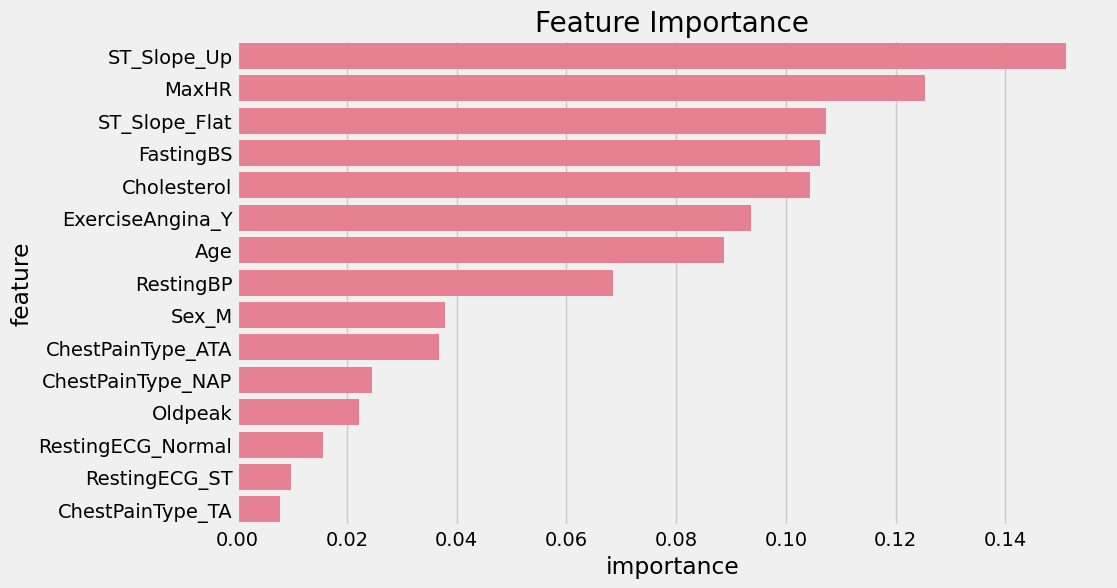

In [9]:
# Get feature importance from Random Forest
rf_model = models['Random Forest']
rf_model.fit(X_train_scaled, y_train)  # Make sure model is fitted

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

### Step - 08: Save Model, Scaler, and Feature names

In [10]:
# Path to save the model, scaler, and feature names
path = 'models/'

# Save the best model (Random Forest)
best_model = models['Random Forest']
dump(best_model, path + 'heart_disease_model.joblib')

# Save the scaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])  # Fit on training data
dump(scaler, path + 'scaler.joblib')

# Save feature names for reference
feature_names = X.columns.tolist()
with open(path + 'feature_names.txt', 'w') as f:
    f.write(','.join(feature_names))

print("Model, scaler, and feature names saved successfully!")

Model, scaler, and feature names saved successfully!
